In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### MinMax

In [ ]:
major_m = pd.read_csv('./drive/MyDrive/공유문서함/상장csv/240317상장주력_minmax.csv', index_col=0)

In [ ]:
major_m.rename(columns={'기타손익비률':'기타손익비율'},inplace=True)

In [ ]:
major_m.drop(['회사명',
  '회계년도',
  '설립일',
  '상장일',
  '상장폐지일',
  '상장협 산업분류(소분류)_x',
  '상장협 산업분류(중분류)_x',
  '회계년',
  'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
major_m.columns

Index(['매출액총이익률', '매출액정상영업이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률', '총자본순이익률',
       '자기자본정상영업이익률', '자기자본순이익률', '경영자본정상영업이익률', '경영자본순이익률',
       ...
       '아연가격', '금가격', '수출물가지수총지수 (2015=100)', '수입물가지수총지수 (2015=100)',
       '소비자물가지수', '수입물량지수', '수입금액지수', '수출물량지수', '수출금액지수', '생산자물가지수'],
      dtype='object', length=144)

In [ ]:
# 각 피처셀렉 알고리즘에서 나온 피처 리스트로 저장
lasso_feature=[ '총자본순이익률', '유보액대비율', '매출액(수익)']
ttest_feature=[ '유보액 대 납입자본배율', '자기자본배율', '유보율', '1주당매출액', '1주당정상영업이익',
       '부가가치(백만원)', '자본', '1주당 CASH FLOW', '영업활동으로 인한 현금흐름(간접법)',
       'CASH FLOW 대 차입금비율', '자본금정상영업이익률', '정상영업이익대비이자보상배율', '총자본정상영업이익률',
       '총자본사업이익률', '1주당순이익', '경영자본정상영업이익률', '자본금순이익률', '순운전자본회전률',
       '유보액대비율', 'CASH FLOW 대 총자본비율']
logit_feature=['매출액정상영업이익률',
 '매출액순이익률',
 '총자본사업이익률',
 '총자본정상영업이익률',
 '총자본순이익률',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '자본금정상영업이익률',
 '자본금순이익률',
 '매출원가 대 매출액비율',
 '기타손익비률',
 '금융손익비율',
 '기업순이익률',
 '인건비 대 총비용비율',
 '금융비용 대 총비용비율',
 '감가상각비 대 총비용비율',
 '지급이자율',
 '적립금비율(재정비율)',
 '재고자산 대 유동자산비율',
 '당좌자산구성비율',
 '비유동장기적합률',
 '매출채권 대 매입채무비율',
 '유동부채비율',
 '비유동부채비율',
 '비유동부채 대 순운전자본비율',
 '순운전자본비율',
 '차입금의존도',
 '차입금비율',
 '유보액대비율',
 '투자집중도',
 'CASH FLOW 대 총자본비율',
 'CASH FLOW 대 매출액비율',
 '자본금회전률',
 '타인자본회전률',
 '매입채무회전률',
 '매입채무회전기간',
 '재고자산회전률',
 '재고자산회전기간',
 '매출채권회전률',
 '매출채권회전기간',
 '비유동자산회전률',
 '순운전자본회전률',
 '운전자본회전률',
 '1회전기간',
 '총자본투자효율',
 '노동소득분배율',
 '매출액(수익)',
 '유형자산증가율',
 '유동자산증가율',
 '비유동자산증가율',
 '재고자산증가율',
 '총포괄이익증가율',
 '총자본증가율',
 '원화의 대미달러',
 '아연가격']
selectK_feature=['매출액정상영업이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률', '총자본순이익률',
       '자기자본정상영업이익률', '자기자본순이익률', '경영자본정상영업이익률', '경영자본순이익률',
       '영업비용 대 영업수익비율', '기타손익비률', '금융비용부담률', '기업순이익률',
       '수지비율(관계기업투자손익 제외)', '적립금비율(재정비율)', '유동부채비율', 'CASH FLOW 대 총자본비율',
       'CASH FLOW 대 매출액비율', '총자본투자효율', '부가가치율'
]

In [ ]:
all_feature = [ '총자본순이익률', '유보액대비율', '매출액(수익)','유보액 대 납입자본배율', '자기자본배율', '유보율', '1주당매출액', '1주당정상영업이익',
       '부가가치(백만원)', '자본', '1주당 CASH FLOW', '영업활동으로 인한 현금흐름(간접법)',
       'CASH FLOW 대 차입금비율', '자본금정상영업이익률', '정상영업이익대비이자보상배율', '총자본정상영업이익률',
       '총자본사업이익률', '1주당순이익', '경영자본정상영업이익률', '자본금순이익률', '순운전자본회전률',
       '유보액대비율', 'CASH FLOW 대 총자본비율','매출액정상영업이익률',
 '매출액순이익률',
 '총자본사업이익률',
 '총자본정상영업이익률',
 '총자본순이익률',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '자본금정상영업이익률',
 '자본금순이익률',
 '매출원가 대 매출액비율',
 '기타손익비률',
 '금융손익비율',
 '기업순이익률',
 '인건비 대 총비용비율',
 '금융비용 대 총비용비율',
 '감가상각비 대 총비용비율',
 '지급이자율',
 '적립금비율(재정비율)',
 '재고자산 대 유동자산비율',
 '당좌자산구성비율',
 '비유동장기적합률',
 '매출채권 대 매입채무비율',
 '유동부채비율',
 '비유동부채비율',
 '비유동부채 대 순운전자본비율',
 '순운전자본비율',
 '차입금의존도',
 '차입금비율',
 '유보액대비율',
 '투자집중도',
 'CASH FLOW 대 총자본비율',
 'CASH FLOW 대 매출액비율',
 '자본금회전률',
 '타인자본회전률',
 '매입채무회전률',
 '매입채무회전기간',
 '재고자산회전률',
 '재고자산회전기간',
 '매출채권회전률',
 '매출채권회전기간',
 '비유동자산회전률',
 '순운전자본회전률',
 '운전자본회전률',
 '1회전기간',
 '총자본투자효율',
 '노동소득분배율',
 '매출액(수익)',
 '유형자산증가율',
 '유동자산증가율',
 '비유동자산증가율',
 '재고자산증가율',
 '총포괄이익증가율',
 '총자본증가율',
 '원화의 대미달러',
 '아연가격','매출액정상영업이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률', '총자본순이익률',
       '자기자본정상영업이익률', '자기자본순이익률', '경영자본정상영업이익률', '경영자본순이익률',
       '영업비용 대 영업수익비율', '기타손익비률', '금융비용부담률', '기업순이익률',
       '수지비율(관계기업투자손익 제외)', '적립금비율(재정비율)', '유동부채비율', 'CASH FLOW 대 총자본비율',
       'CASH FLOW 대 매출액비율', '총자본투자효율', '부가가치율']

In [ ]:
all = pd.DataFrame(all_feature)
all.value_counts()[:25]

유보액대비율               3
CASH FLOW 대 총자본비율    3
총자본정상영업이익률           3
총자본순이익률              3
총자본사업이익률             3
순운전자본회전률             2
기타손익비률               2
자기자본순이익률             2
자기자본정상영업이익률          2
자본금순이익률              2
자본금정상영업이익률           2
매출액정상영업이익률           2
매출액순이익률              2
적립금비율(재정비율)          2
매출액(수익)              2
기업순이익률               2
경영자본정상영업이익률          2
총자본투자효율              2
CASH FLOW 대 매출액비율    2
유동부채비율               2
원화의 대미달러             1
차입금의존도               1
유동자산증가율              1
유보액 대 납입자본배율         1
타인자본회전률              1
dtype: int64

상관계수 vif 고려해서 20개에서 줄이기

In [ ]:
fea_df= major_m[['유보액대비율',
'CASH FLOW 대 총자본비율',
'총자본정상영업이익률',
'총자본순이익률',
'총자본사업이익률',
'순운전자본회전률',
'기타손익비율',
'자기자본순이익률',
'자기자본정상영업이익률',
'자본금순이익률',
'자본금정상영업이익률',
'매출액정상영업이익률',
'매출액순이익률',
'적립금비율(재정비율)',
'매출액(수익)',
'기업순이익률',
'경영자본정상영업이익률',
'총자본투자효율',
'CASH FLOW 대 매출액비율',
'유동부채비율']]

In [ ]:
fea_df.reset_index(drop=True, inplace=True)

In [ ]:
fea_df2 = fea_df.drop(['총자본정상영업이익률','기업순이익률','매출액정상영업이익률','총자본사업이익률','기타손익비율','총자본순이익률','경영자본정상영업이익률','자기자본정상영업이익률','CASH FLOW 대 매출액비율','적립금비율(재정비율)','매출액(수익)','자본금정상영업이익률','매출액순이익률','CASH FLOW 대 총자본비율'], axis=1)

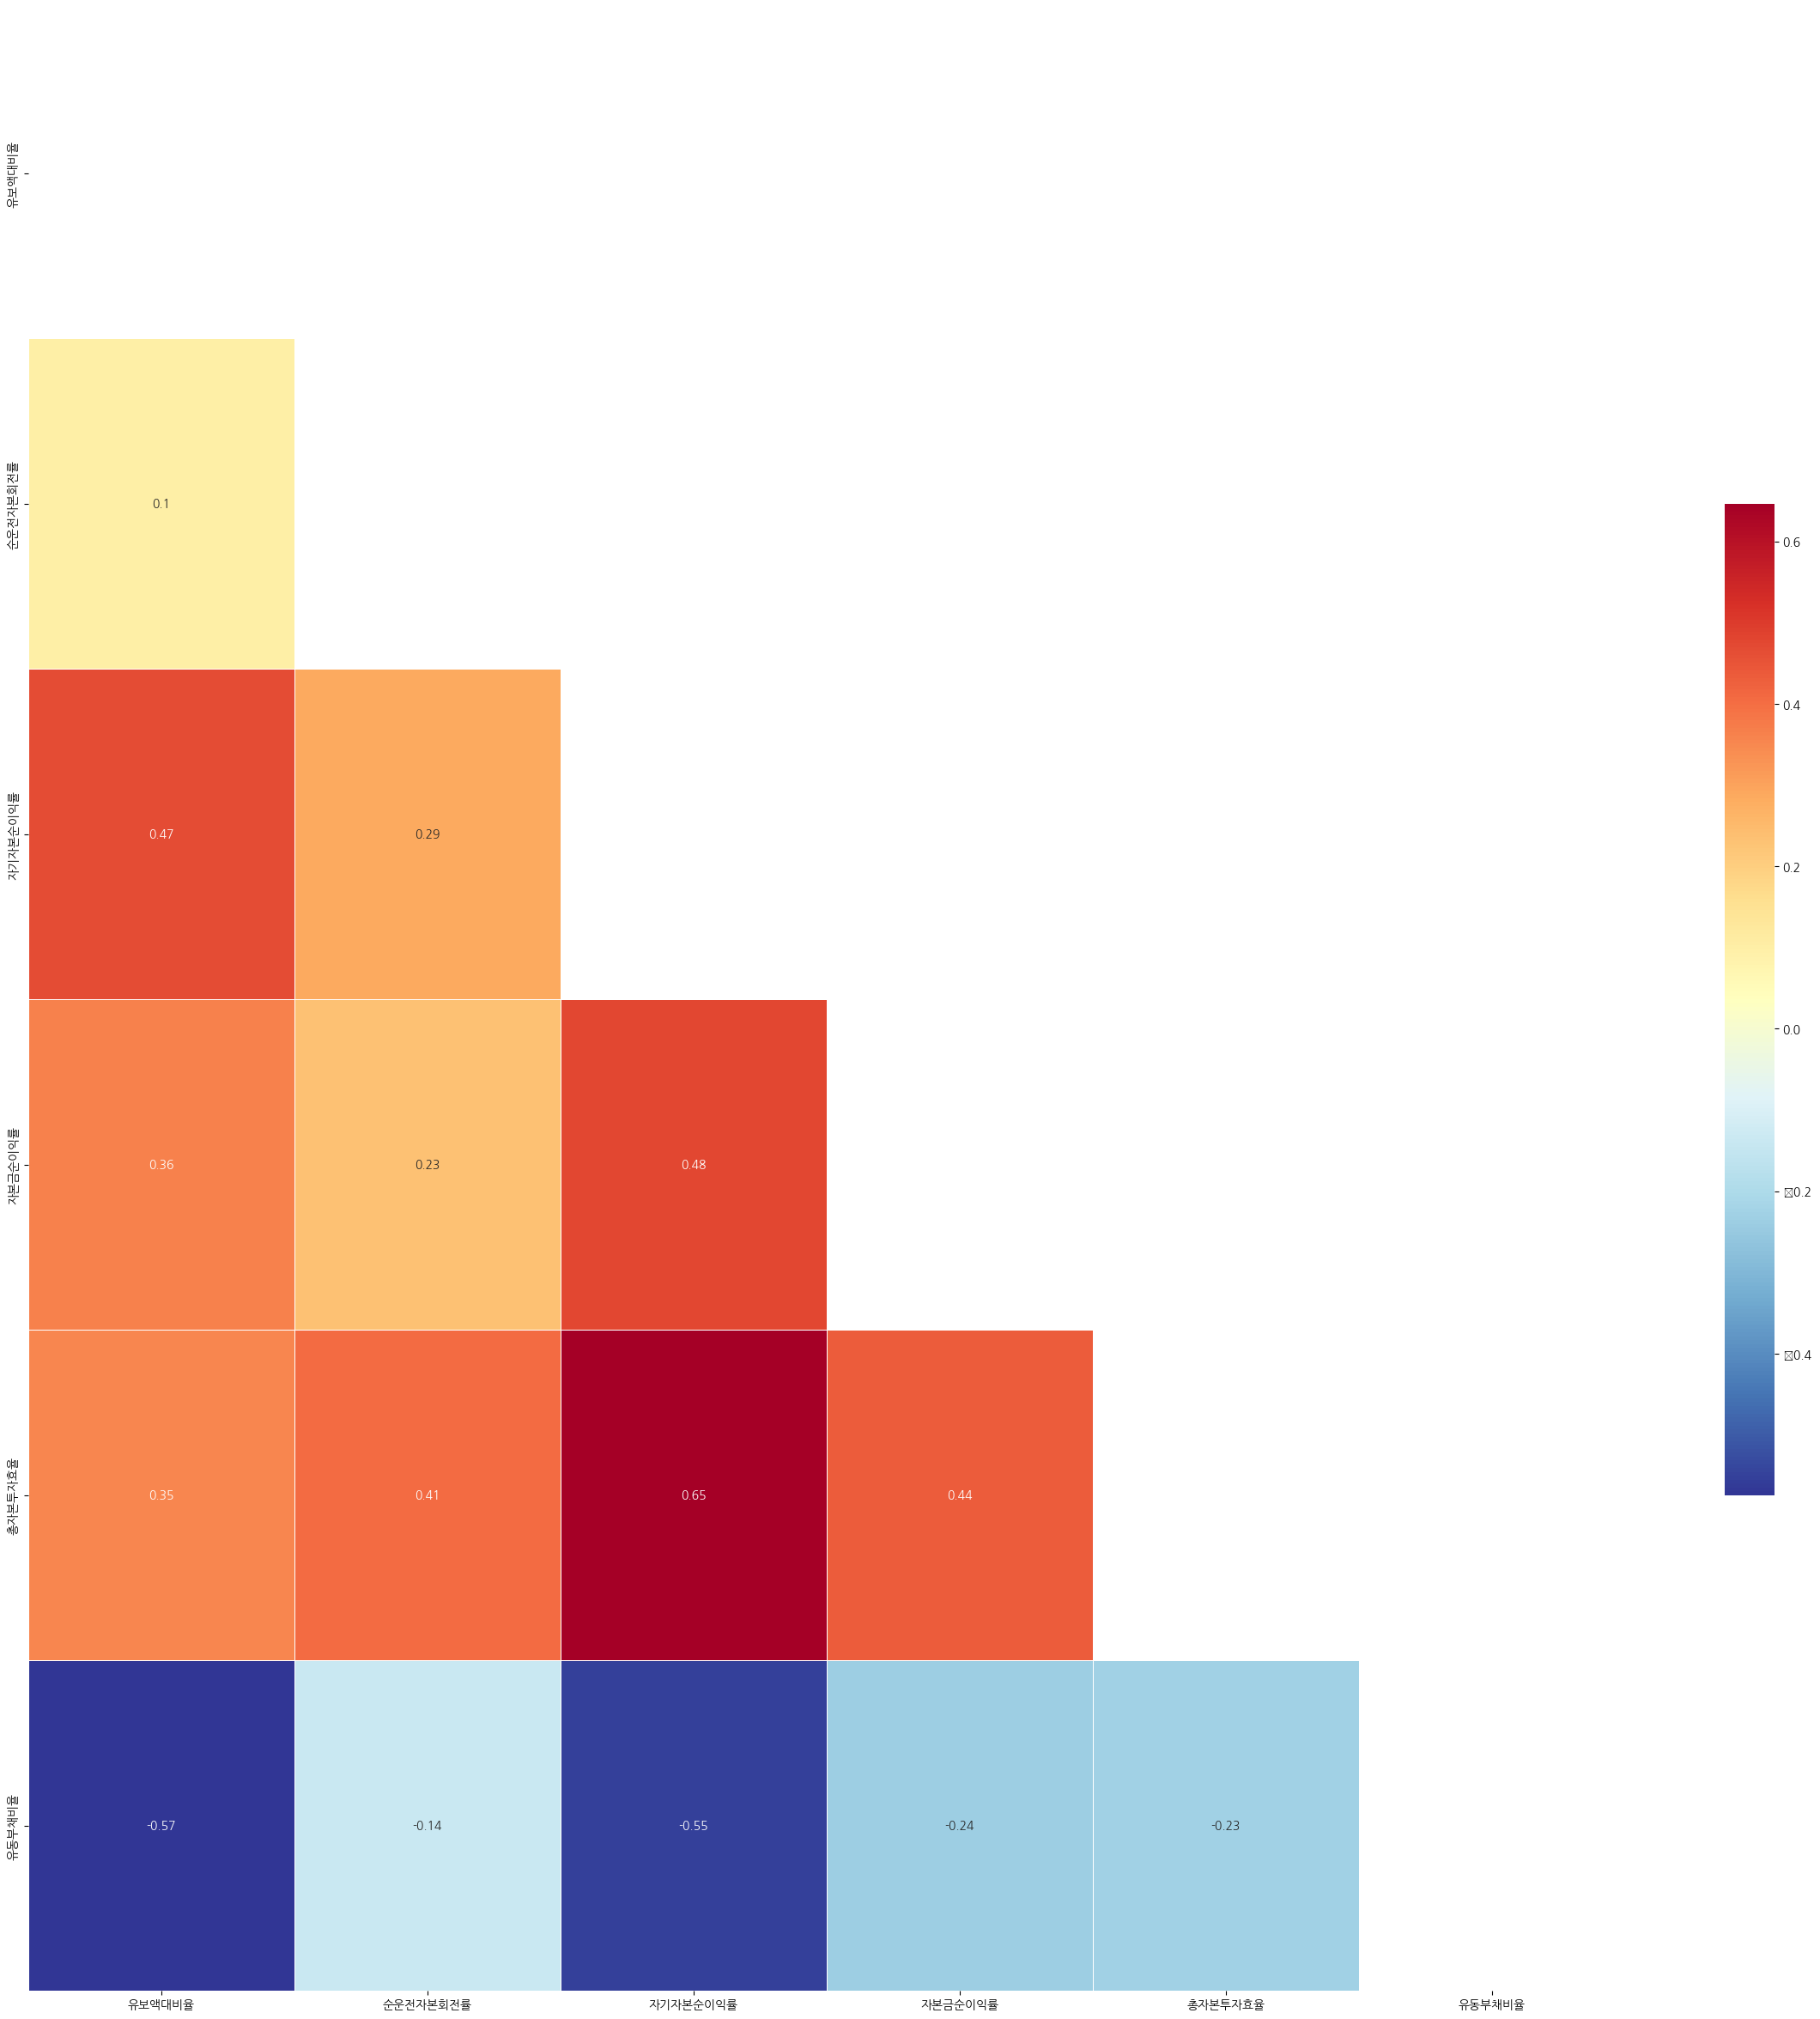

In [ ]:
def corr_heatmap(dataset, method_option = 'pearson'):

    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool)
    plt.figure(figsize=(30,30))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5},
                annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(fea_df2)

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산을 위한 함수 정의
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# VIF 계산 실행
vif_result = calculate_vif(fea_df2)


In [ ]:
vif_result.sort_values('VIF', ascending=False)

,Variable,VIF
2,자기자본순이익률,64.477853
4,총자본투자효율,60.722608
0,유보액대비율,20.623015
3,자본금순이익률,13.399869
1,순운전자본회전률,6.038356
5,유동부채비율,1.644304


##### 2개 이상 중복인 피처

In [ ]:
# 2개 이상 알고리즘에서 셀렉된 피처
dup_feature=['매출액순이익률',
'자기자본순이익률',
'적립금비율(재정비율)',
'자기자본정상영업이익률',
'기타손익비율',
'자본금순이익률',
'자본금정상영업이익률',
'기업순이익률',
'CASH FLOW 대 총자본비율',
'총자본사업이익률',
'총자본순이익률',
'총자본정상영업이익률']

In [ ]:
# # 각 feature 배열의 최대 길이 계산
# max_length = max(len(ttest_feature), len(lasso_feature), len(logit_feature), len(selectK_feature),len(dup_feature))

# # 배열의 길이를 최대 길이에 맞춰서 Series 생성
# ttest_series = pd.Series(ttest_feature + [np.nan] * (max_length - len(ttest_feature)))
# lasso_series = pd.Series(lasso_feature + [np.nan] * (max_length - len(lasso_feature)))
# logit_series = pd.Series(logit_feature + [np.nan] * (max_length - len(logit_feature)))
# selectK_series = pd.Series(selectK_feature + [np.nan] * (max_length - len(selectK_feature)))
# dup_series = pd.Series(dup_feature + [np.nan] * (max_length - len(dup_feature)))

# # DataFrame 생성
# fea_df = pd.DataFrame({
#     'ttest_feature': ttest_series,
#     'lasso_feature': lasso_series,
#     'logit_feature': logit_series,
#     'selectK_feature': selectK_series,
#     'dup_feature': dup_series
# })


### Standard

In [3]:
major_s = pd.read_csv('./drive/MyDrive/공유문서함/상장csv/240317상장주력_stand.csv', index_col=0)

In [ ]:
# 각 피처셀렉 알고리즘에서 나온 피처 리스트로 저장
lasso_feature=[ '매출액순이익률', '자기자본정상영업이익률', '자기자본순이익률', '자본금순이익률', '기타손익비률',
       '금융비용부담률', '적립금비율(재정비율)', '재고자산 대 유동자산비율', '유동부채비율', '비유동부채비율',
       'CASH FLOW 대 매출액비율', '매입채무회전기간', '매출채권회전기간', '소비자물가지수']

ttest_feature= ['유보액 대 납입자본배율', '자기자본배율', '유보율', '1주당매출액', '1주당정상영업이익',
       '부가가치(백만원)', '자본', '1주당 CASH FLOW', '영업활동으로 인한 현금흐름(간접법)',
       'CASH FLOW 대 차입금비율', '자본금정상영업이익률', '정상영업이익대비이자보상배율', '총자본정상영업이익률',
       '총자본사업이익률', '1주당순이익', '경영자본정상영업이익률', '자본금순이익률', '순운전자본회전률',
       '유보액대비율', 'CASH FLOW 대 총자본비율']

logit_feature=['매출액총이익률',
 '매출액정상영업이익률',
 '총자본사업이익률',
 '총자본순이익률',
 '자기자본정상영업이익률',
 '경영자본정상영업이익률',
 '자본금정상영업이익률',
 '매출원가 대 매출액비율',
 '기타손익비률',
 '금융비용부담률',
 '수지비율(관계기업투자손익 제외)',
 '인건비 대 총비용비율',
 '금융비용 대 총비용비율',
 '감가상각비 대 총비용비율',
 '유보율',
 '1주당매출액',
 '1주당순이익',
 '1주당정상영업이익',
 '재고자산 대 유동자산비율',
 '유동자산 대 비유동자산비율',
 '자기자본배율',
 '비유동비율',
 '매출채권 대 매입채무비율',
 '부채비율',
 '비유동부채비율',
 '비유동부채 대 순운전자본비율',
 '순운전자본비율',
 '차입금의존도',
 '차입금비율',
 '유동자산집중도',
 '비유동자산집중도',
 '투자집중도',
 'CASH FLOW 대 부채비율',
 'CASH FLOW 대 차입금비율',
 'CASH FLOW 대 총자본비율',
 'CASH FLOW 대 매출액비율',
 '경영자본회전률',
 '자본금회전률',
 '타인자본회전률',
 '매입채무회전률',
 '당좌자산회전률',
 '재고자산회전률',
 '매출채권회전기간',
 '비유동자산회전률',
 '순운전자본회전률',
 '노동소득분배율',
 '자본분배율',
 '투자활동으로 인한 현금흐름',
 '자본',
 '매출액(수익)',
 '투자부동산증가율',
 '총자본증가율'
]

selectK_feature=['매출액정상영업이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률', '총자본순이익률',
       '자기자본정상영업이익률', '자기자본순이익률', '경영자본정상영업이익률', '경영자본순이익률',
       '영업비용 대 영업수익비율', '기타손익비률', '금융비용부담률', '기업순이익률',
       '수지비율(관계기업투자손익 제외)', '적립금비율(재정비율)', '유동부채비율', 'CASH FLOW 대 총자본비율',
       'CASH FLOW 대 매출액비율', '총자본투자효율', '부가가치율']

In [4]:
all_fea2=['매출액순이익률', '자기자본정상영업이익률', '자기자본순이익률', '자본금순이익률', '기타손익비률',
       '금융비용부담률', '적립금비율(재정비율)', '재고자산 대 유동자산비율', '유동부채비율', '비유동부채비율',
       'CASH FLOW 대 매출액비율', '매입채무회전기간', '매출채권회전기간', '소비자물가지수','유보액 대 납입자본배율', '자기자본배율', '유보율', '1주당매출액', '1주당정상영업이익',
       '부가가치(백만원)', '자본', '1주당 CASH FLOW', '영업활동으로 인한 현금흐름(간접법)',
       'CASH FLOW 대 차입금비율', '자본금정상영업이익률', '정상영업이익대비이자보상배율', '총자본정상영업이익률',
       '총자본사업이익률', '1주당순이익', '경영자본정상영업이익률', '자본금순이익률', '순운전자본회전률',
       '유보액대비율', 'CASH FLOW 대 총자본비율','매출액총이익률',
 '매출액정상영업이익률',
 '총자본사업이익률',
 '총자본순이익률',
 '자기자본정상영업이익률',
 '경영자본정상영업이익률',
 '자본금정상영업이익률',
 '매출원가 대 매출액비율',
 '기타손익비률',
 '금융비용부담률',
 '수지비율(관계기업투자손익 제외)',
 '인건비 대 총비용비율',
 '금융비용 대 총비용비율',
 '감가상각비 대 총비용비율',
 '유보율',
 '1주당매출액',
 '1주당순이익',
 '1주당정상영업이익',
 '재고자산 대 유동자산비율',
 '유동자산 대 비유동자산비율',
 '자기자본배율',
 '비유동비율',
 '매출채권 대 매입채무비율',
 '부채비율',
 '비유동부채비율',
 '비유동부채 대 순운전자본비율',
 '순운전자본비율',
 '차입금의존도',
 '차입금비율',
 '유동자산집중도',
 '비유동자산집중도',
 '투자집중도',
 'CASH FLOW 대 부채비율',
 'CASH FLOW 대 차입금비율',
 'CASH FLOW 대 총자본비율',
 'CASH FLOW 대 매출액비율',
 '경영자본회전률',
 '자본금회전률',
 '타인자본회전률',
 '매입채무회전률',
 '당좌자산회전률',
 '재고자산회전률',
 '매출채권회전기간',
 '비유동자산회전률',
 '순운전자본회전률',
 '노동소득분배율',
 '자본분배율',
 '투자활동으로 인한 현금흐름',
 '자본',
 '매출액(수익)',
 '투자부동산증가율',
 '총자본증가율','매출액정상영업이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률', '총자본순이익률',
       '자기자본정상영업이익률', '자기자본순이익률', '경영자본정상영업이익률', '경영자본순이익률',
       '영업비용 대 영업수익비율', '기타손익비률', '금융비용부담률', '기업순이익률',
       '수지비율(관계기업투자손익 제외)', '적립금비율(재정비율)', '유동부채비율', 'CASH FLOW 대 총자본비율',
       'CASH FLOW 대 매출액비율', '총자본투자효율', '부가가치율']

In [5]:
all_std = pd.DataFrame(all_fea2)
all_std.value_counts()[:30]

경영자본정상영업이익률          3
기타손익비률               3
CASH FLOW 대 매출액비율    3
금융비용부담률              3
CASH FLOW 대 총자본비율    3
총자본사업이익률             3
자기자본정상영업이익률          3
매출액순이익률              2
1주당매출액               2
자기자본순이익률             2
적립금비율(재정비율)          2
매출액정상영업이익률           2
자본                   2
재고자산 대 유동자산비율        2
매출채권회전기간             2
비유동부채비율              2
수지비율(관계기업투자손익 제외)    2
총자본정상영업이익률           2
총자본순이익률              2
자본금정상영업이익률           2
자기자본배율               2
순운전자본회전률             2
유보율                  2
CASH FLOW 대 차입금비율    2
유동부채비율               2
1주당정상영업이익            2
1주당순이익               2
자본금순이익률              2
인건비 대 총비용비율          1
1주당 CASH FLOW        1
dtype: int64

#### 2개 이상 중복인 피처

In [6]:
major_s.rename(columns={'기타손익비률':'기타손익비율'},inplace=True)

In [7]:
major_s.drop(['회사명',
  '회계년도',
  '설립일',
  '상장일',
  '상장폐지일',
  '상장협 산업분류(소분류)_x',
  '상장협 산업분류(중분류)_x',
  '회계년',
  'Unnamed: 0'], axis=1, inplace=True)

In [8]:
std_df =major_s[['경영자본정상영업이익률',
'기타손익비율',
'CASH FLOW 대 매출액비율',
'금융비용부담률',
'CASH FLOW 대 총자본비율',
'총자본사업이익률',
'자기자본정상영업이익률',
'매출액순이익률',
'1주당매출액',
'자기자본순이익률',
'적립금비율(재정비율)',
'매출액정상영업이익률',
'자본',
'재고자산 대 유동자산비율',
'매출채권회전기간',
'비유동부채비율',
'수지비율(관계기업투자손익 제외)',
'총자본정상영업이익률',
'총자본순이익률',
'자본금정상영업이익률',
'자기자본배율',
'순운전자본회전률',
'유보율',
'CASH FLOW 대 차입금비율',
'유동부채비율',
'1주당정상영업이익',
'1주당순이익',
'자본금순이익률']]

In [9]:
std_df.reset_index(drop=True, inplace=True)

In [18]:
std_df2 = std_df.drop(['총자본정상영업이익률','자기자본배율','경영자본정상영업이익률',
                       '수지비율(관계기업투자손익 제외)','총자본순이익률','매출액정상영업이익률',
                       '자본금정상영업이익률','자기자본정상영업이익률','1주당정상영업이익','1주당순이익','기타손익비율','CASH FLOW 대 총자본비율','자본금순이익률',
                       '총자본사업이익률', '금융비용부담률'	], axis=1)

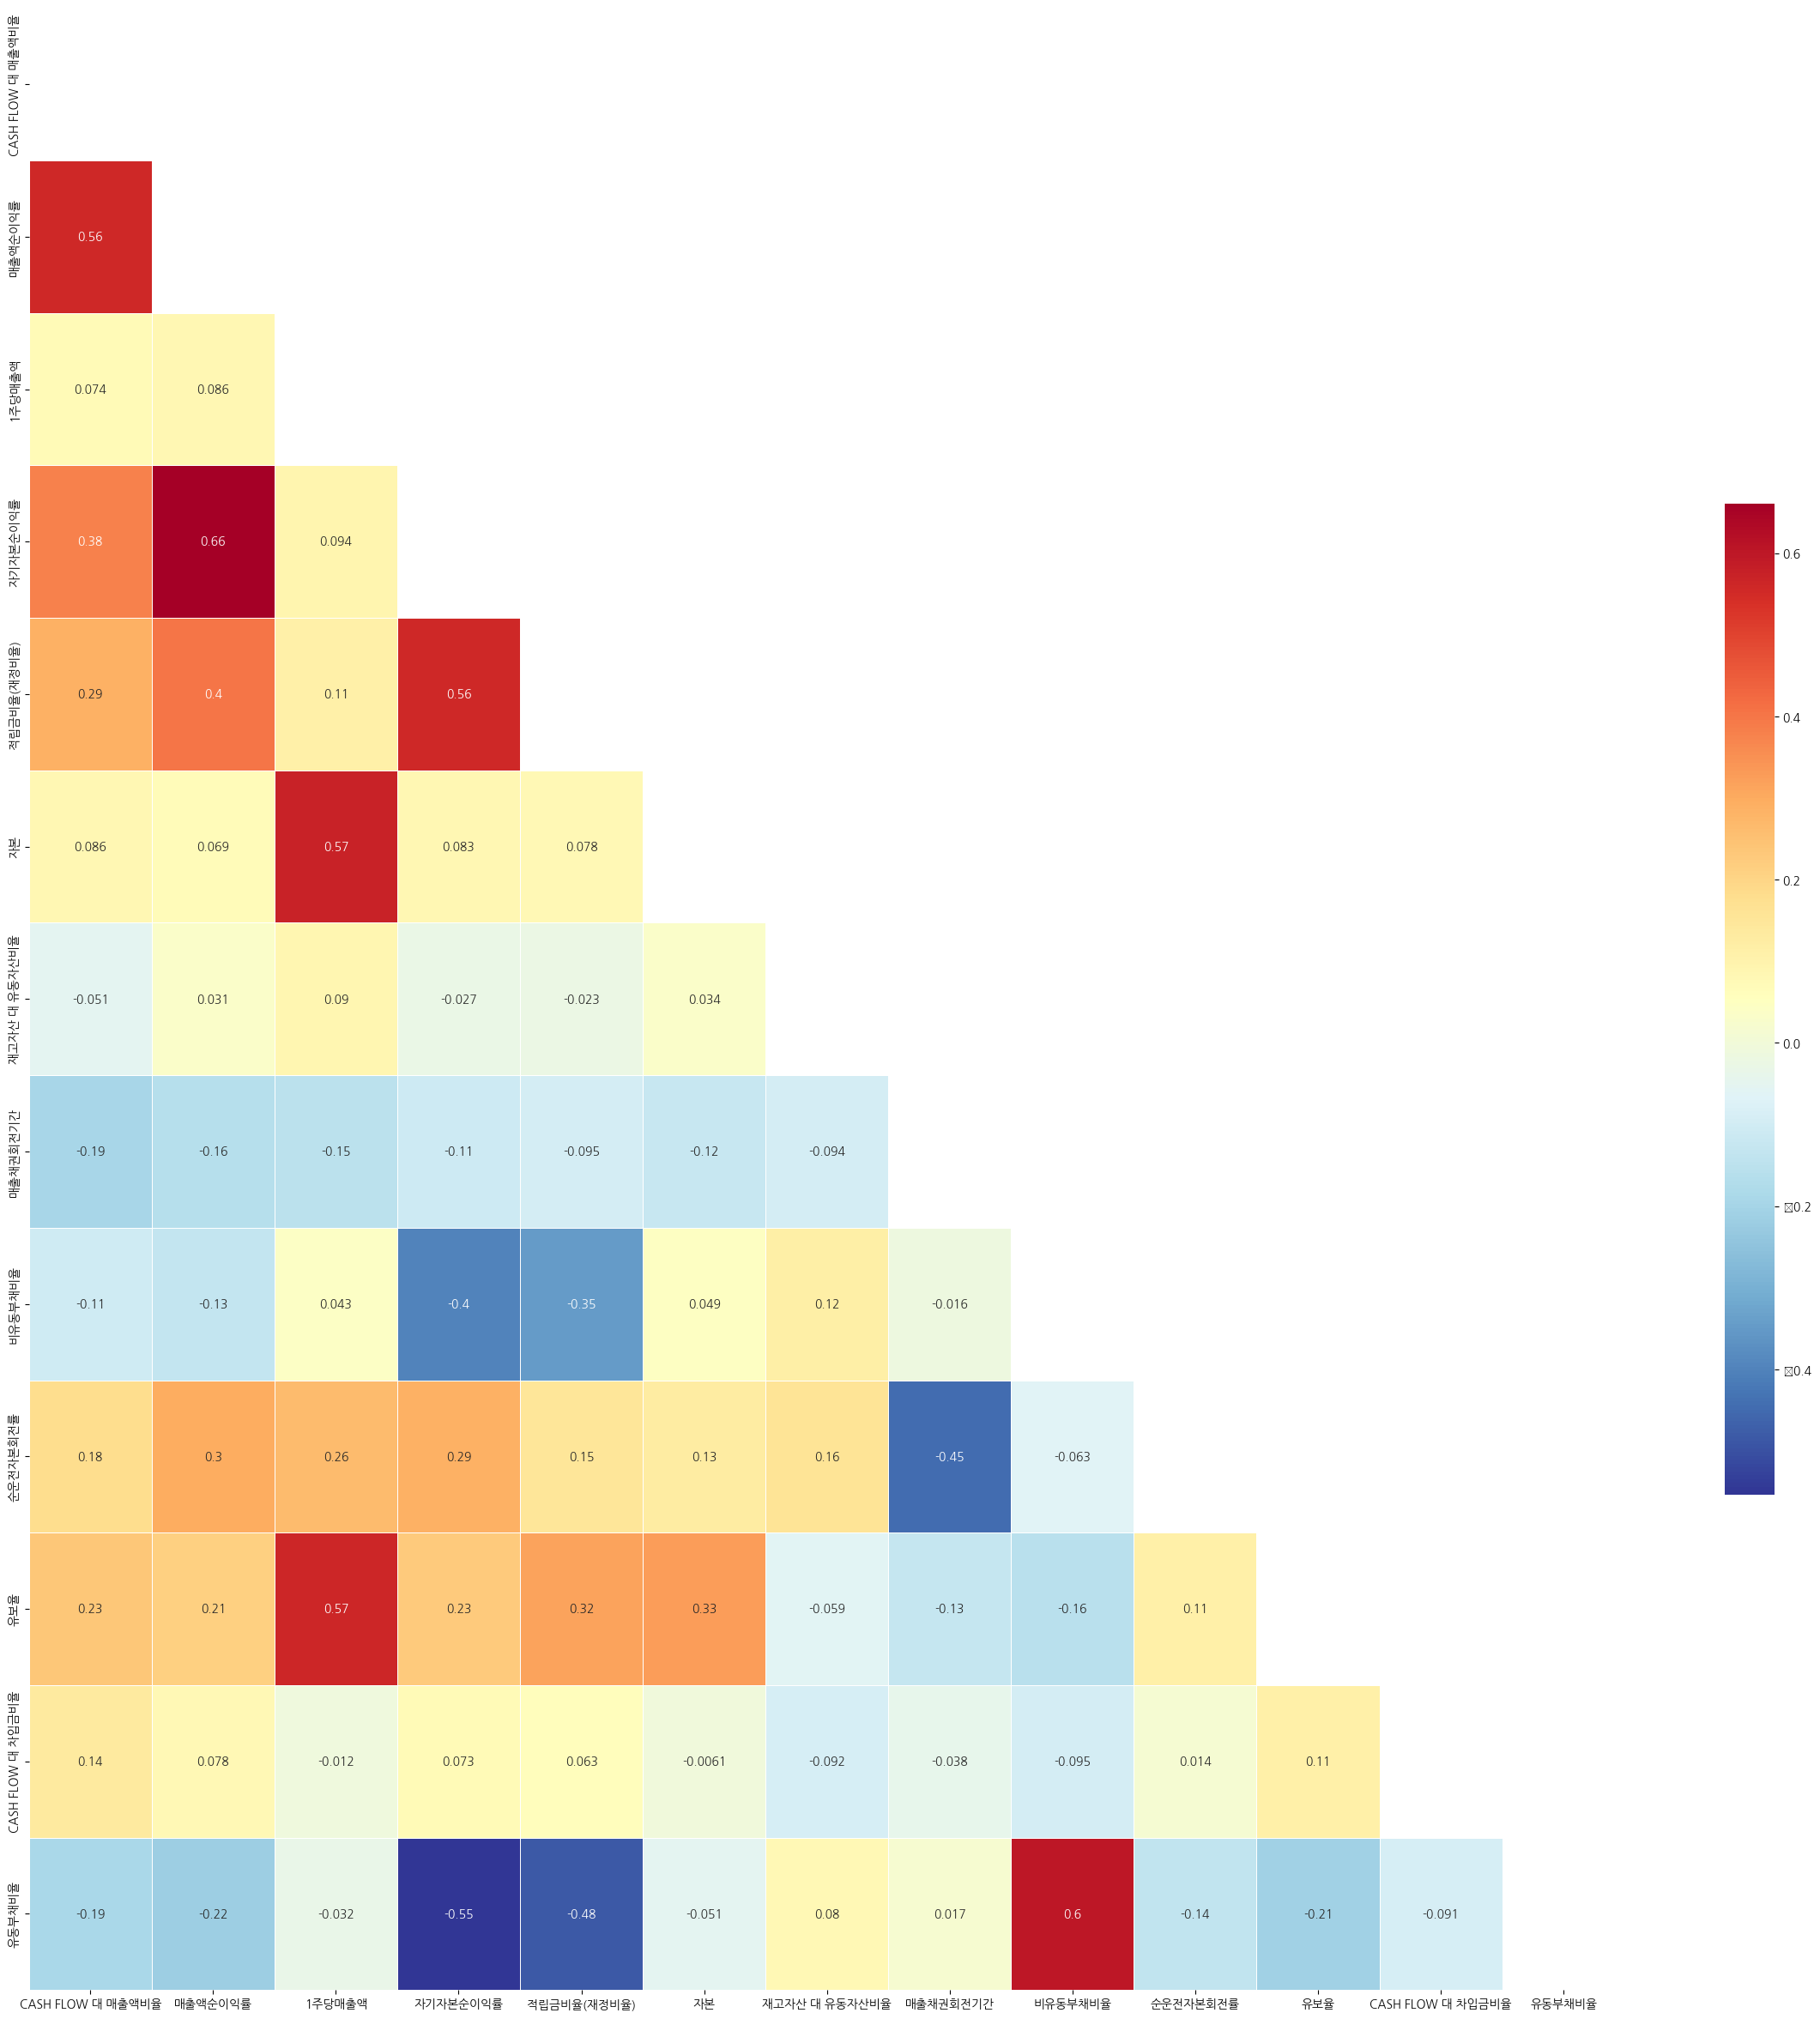

In [19]:
def corr_heatmap(dataset, method_option = 'pearson'):

    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool)
    plt.figure(figsize=(30,30))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5},
                annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(std_df2)

In [20]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산을 위한 함수 정의
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# VIF 계산 실행
vif_result = calculate_vif(std_df2)


In [22]:
vif_result.sort_values('VIF', ascending=False)

,Variable,VIF
3,자기자본순이익률,2.829037
1,매출액순이익률,2.458506
2,1주당매출액,2.185164
12,유동부채비율,2.105884
10,유보율,1.767542
4,적립금비율(재정비율),1.660268
8,비유동부채비율,1.653916
0,CASH FLOW 대 매출액비율,1.551159
5,자본,1.515135
9,순운전자본회전률,1.487808


In [23]:
vif_result['Variable'].values

array(['CASH FLOW 대 매출액비율', '매출액순이익률', '1주당매출액', '자기자본순이익률',
       '적립금비율(재정비율)', '자본', '재고자산 대 유동자산비율', '매출채권회전기간', '비유동부채비율',
       '순운전자본회전률', '유보율', 'CASH FLOW 대 차입금비율', '유동부채비율'], dtype=object)

### 상장 주력 standard 최종 피처
 - ['CASH FLOW 대 매출액비율', '매출액순이익률', '1주당매출액', '자기자본순이익률','적립금비율(재정비율)', '자본', '재고자산 대 유동자산비율', '매출채권회전기간', '비유동부채비율', '순운전자본회전률', '유보율', 'CASH FLOW 대 차입금비율', '유동부채비율']

### 비주력